<a href="https://colab.research.google.com/github/Vedu-Singh/Data-Science/blob/main/ML_ClassificationRandomForest_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.> Random-Forest / RF-Classifier in Machine Learning For Classification Problem - Wine Dataset ---->**

In [14]:
#import all the necessary libraries --->

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [15]:
# perform train-test split -->
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df.drop('Target', axis='columns')
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=5)

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Data Scaling -->
scaler = MinMaxScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

In [17]:
# In Dtree -> target was to reduce the value of parameters like - gini-index or entropy so that your node will lead towards the pure subset / pure node
# Random-Forest Classfier ---> create multiple sub-Dtree and then we go for pure subset node -> at the end what majority of tree prediction that will be the final prediction
# There is one difference btw Dtree and Rfc that one parameter is added that is n_estimators
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=3 , criterion='entropy',
                                max_leaf_nodes = 5,
                                min_samples_leaf = 1,
                                min_samples_split = 2)        # relying on 100 D-trees

model.fit(X_trainScaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5)

In [18]:
# modal evaluation --->
print(model.score(X_testScaled, y_test))
print(model.score(X_trainScaled, y_train))
print(classification_report(y_test, model.predict(X_testScaled)))

0.9444444444444444
1.0
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



In [20]:
print(classification_report(y_train, model.predict(X_trainScaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



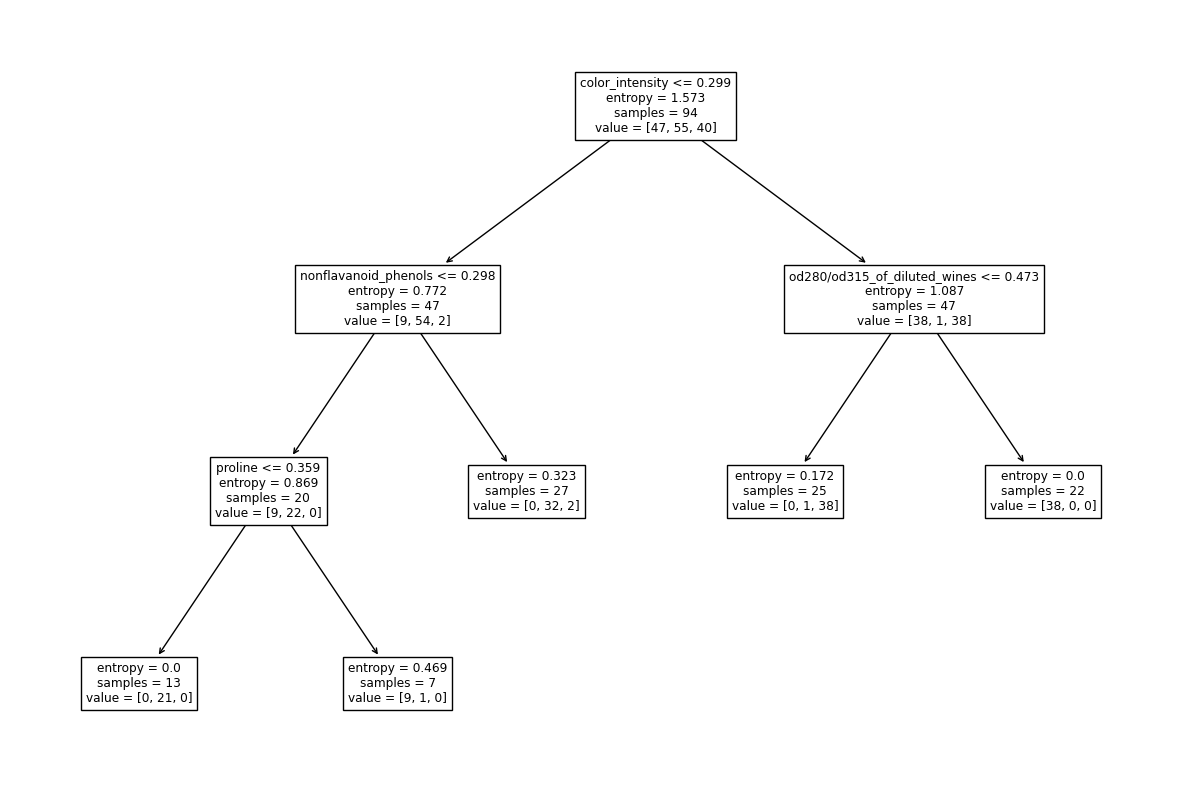

In [22]:
# plot it  ---->
from sklearn import tree
plt.figure(figsize = (15,10))

tree.plot_tree(model[1],
               feature_names = X_train.columns)

plt.show()